## Feature Selection mit Korrelation & PPS

Um relevante Features für ein Modell zu extrahieren kann sowohl die Korrelation, als auch der PPS ein hilfreiches Tool sein. Welches der beiden Tools geeigneter ist, hängt immer von dem Anwendungsfall ab. In diesem Notebook wird gezeigt wie Sie beide Methoden anwenden können, um aussagekräftige Features zu finden, welche Ihnen Aufschluss über Ihr Dataset geben und später Ihnen die Feature Selection vereinfachen.

#### Imports

In [4]:
import pandas as pd
import ppscore as pps
import seaborn as sns
import missingno as msno

In [5]:
df = sns.load_dataset("mpg")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [11]:
matrix  = pps.matrix(df).pivot(columns='x', index='y',  values='ppscore')

C:\Users\tigi\Anaconda3\envs\IDFY\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tigi\Anaconda3\envs\IDFY\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tigi\Anaconda3\envs\IDFY\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tigi\Anaconda3\envs\IDFY\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users

<AxesSubplot:xlabel='x', ylabel='y'>

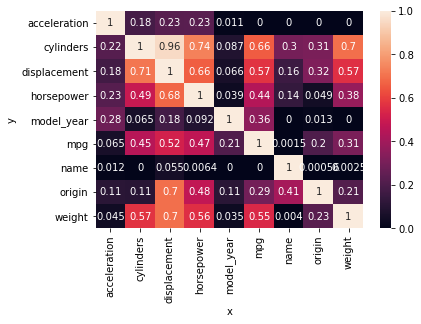

In [12]:
sns.heatmap(matrix, annot=True)

<AxesSubplot:>

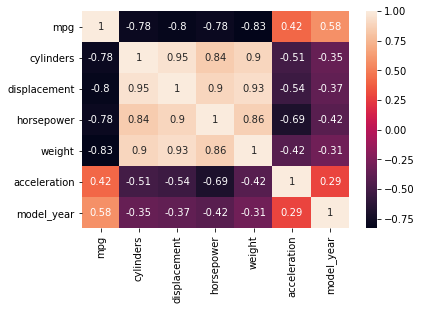

In [15]:
sns.heatmap(df.corr(),annot=True)

#### Imputation

In [17]:
from sklearn.impute import SimpleImputer

In [21]:
imputer = SimpleImputer()
horsepower = df[['horsepower']].copy()
df.horsepower = imputer.fit_transform(horsepower)

<AxesSubplot:>

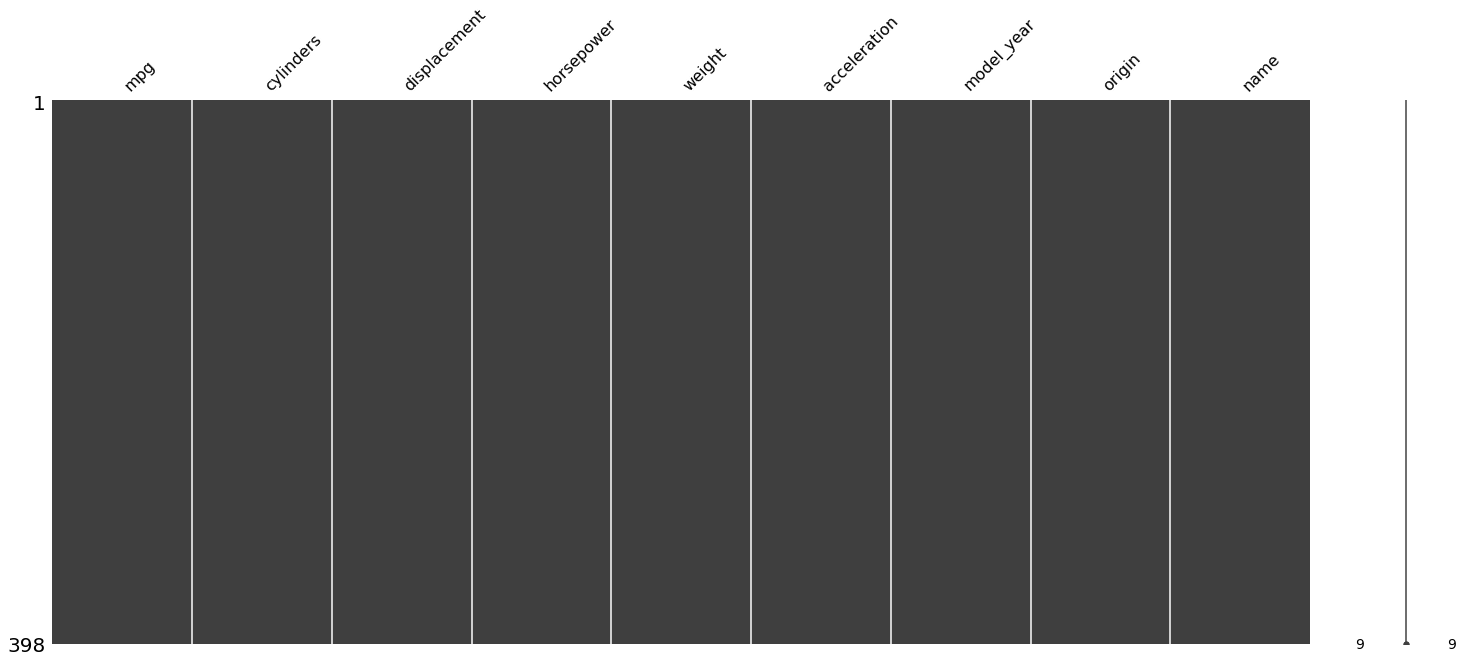

In [22]:
msno.matrix(df)

#### Modellbildung

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [25]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [26]:
X = df.loc[:,['mpg','displacement','horsepower','weight']] #Warum wird Name weggelassen obwohl der PPS besser ist,als bei horsepower?
y = df.origin

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = DecisionTreeClassifier()

params = {
    "max_depth": range(1,10)
}

search = GridSearchCV(clf, params,cv=5)
search.fit(X_train,y_train)
search.score(X_test,y_test)

0.725

In [27]:
X = df.iloc[:,:-2] #Warum wird Name weggelassen obwohl der PPS besser ist,als bei horsepower?
y = df.origin

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = DecisionTreeClassifier()

params = {
    "max_depth": range(1,10)
}

search = GridSearchCV(clf, params,cv=5)
search.fit(X_train,y_train)
search.score(X_test,y_test)

0.75

In [29]:
search.best_params_

{'max_depth': 7}

#### Forward/Backward Selection

In [30]:
from sklearn.feature_selection import SequentialFeatureSelector

clf  = DecisionTreeClassifier(max_depth=7)
sfs = SequentialFeatureSelector(clf,n_features_to_select=None, direction='forward', cv=5) ## Bei n_features_to_select = None wird die Hälfte der Features gewählt

sfs.fit(X,y)

sfs.get_support()

array([False,  True,  True, False,  True, False, False])

In [34]:
new_X = X.loc[:,sfs.get_support()] ##Benutzen der Maske um Features auszuwählen

In [35]:
X_train, X_test, y_train, y_test = train_test_split(new_X,y, test_size=0.2)

clf = DecisionTreeClassifier()

params = {
    "max_depth": range(1,10)
}

search = GridSearchCV(clf, params,cv=5)
search.fit(X_train,y_train)
search.score(X_test,y_test)

0.875

### Fazit

Wie man sehen kann, reicht eine einfach Analyse nach Korrelation oder PPS nicht aus um eine angemessene Feature Selection vorzunehmen. Dies ist der Fall da Synergieeffekte zwischen mehreren Variablen bestehen, welche eine höhere Performance nach sich ziehen.